In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import helper
from collections import defaultdict
import seaborn as sns
from scipy.stats import pearsonr, linregress
from scipy import stats

In [79]:
#root="~/Documents/GitHub/CA_GRN2/results_new_rules/"
#root="~/Documents/GitHub/CA_GRN2/results_testing_saving/"
root="~/scratch/non_detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860]###
metric = "maxfits"
num_reps = 3

# NOTE: CAN USE BELOW CODE WITH THE FOLLOWING: 
# avail_metrics = ["avefits","maxfits","beststd","spec_pheno_stds", "pheno_stds", "geno_stds"]
# beststd - how good it could get at biased phenotypic variation, max
# spec_pheno_stds - how good it could get at biased phenotypic variation, mean
# pheno_stds - pheno variation among kids of one parent

#NOTE: I HAVE DECIDED THAT IT IS WEIRD TO END WITH SEASON 1 and have that season be seen more than season 2. 
# So cutting off end to be 9600 ends with season 2, all 300 gens (double checked)

xs = []
ys = []
#rules=np.array([22, 126, 146, 154, 82, 86, 18, 118, 122, 70,54,94,30,50,62,110,90,150,102,254])
#rules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])
rules=np.arange(0,256)

#Excluded 82 == 154, 146 == 18, 86 == 30, 118 == 62, 254 conceptually == 50
print(len(rules))
stds_mask = []
for rule in rules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    xs.append(c[0])
    ys.append(c[1])

256


In [3]:
'''
for i, rule in enumerate(rules):
    if rule in stds_mask and rule %2==0: #and ys[i] > -0.01: # the few patterns ys[i] > -0.01 not representative of very simple patterns
        #if label not in [38,134,198]: #not representative of very simple patterns
            plt.scatter(xs[i],ys[i],color="red")
            plt.text(xs[i], ys[i], rule, fontsize=12, color = "black")
'''

'\nfor i, rule in enumerate(rules):\n    if rule in stds_mask and rule %2==0: #and ys[i] > -0.01: # the few patterns ys[i] > -0.01 not representative of very simple patterns\n        #if label not in [38,134,198]: #not representative of very simple patterns\n            plt.scatter(xs[i],ys[i],color="red")\n            plt.text(xs[i], ys[i], rule, fontsize=12, color = "black")\n'

In [80]:
root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860]###
metric = "maxfits"
num_reps = 15
orirules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])

orixs=[]
oriys=[]
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    orixs.append(c[0])
    oriys.append(c[1])

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-0.8, 0.5)

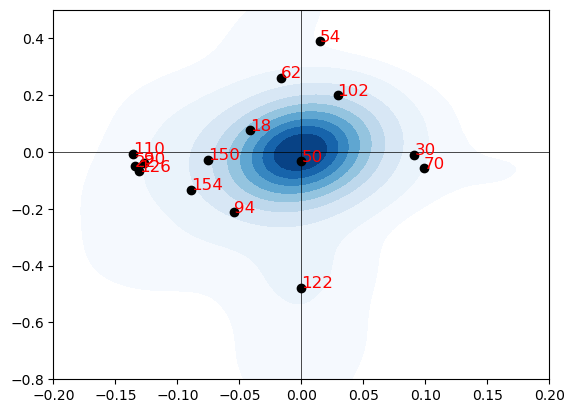

In [82]:
usefulxs = []
usefulys = []
for i, rule in enumerate(rules):
    if rule %2 == 0: #only check even rules, 000 -> 1
        usefulxs.append(xs[i])
        usefulys.append(ys[i])

sns.kdeplot(x=usefulxs, y=usefulys, cmap="Blues", fill=True, thresh=0.1)

for i, label in enumerate(orirules):
    plt.text(orixs[i], oriys[i], label, fontsize=12, color = "red")

plt.scatter(orixs, oriys, color = "black")

plt.axvline(0, lw=0.5, color="black")
plt.axhline(0, lw=0.5, color="black")
plt.xlim(-0.2,0.2)
plt.ylim(-0.8,0.5)

In [70]:
root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860] ###
metric = "avefits"
num_reps = 15
orirules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])

newxs=[]
newys=[]
vari_ave=[]
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    newxs.append(c[0])
    newys.append(c[1])
    vari_ave.append((c[0]+c[1])/2)

seed_ints = [4147842,1238860] ###
root="~/scratch/non_detailed_save/"
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    newxs.append(c[0])
    newys.append(c[1])
    vari_ave.append((c[0]+c[1])/2)



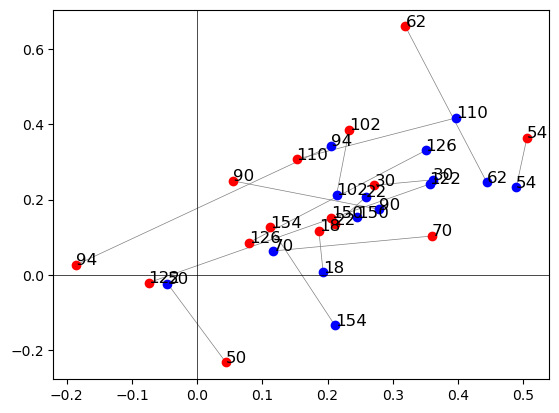

In [71]:
#plt.scatter(xs, ys, color="blue")
plt.scatter(newxs[:15], newys[:15], color="red")
plt.scatter(newxs[15:], newys[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(newxs[i], newys[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(newxs[i+15], newys[i+15], label, fontsize=12, color = "black")
for x0, x1, y0, y1 in zip(newxs[:15],newxs[15:], newys[:15], newys[15:]):
    plt.plot([x0,x1],[y0,y1],lw=0.5, color="gray",zorder=-1)
plt.axvline(0, lw=0.5, color="black")
plt.axhline(0, lw=0.5, color="black")

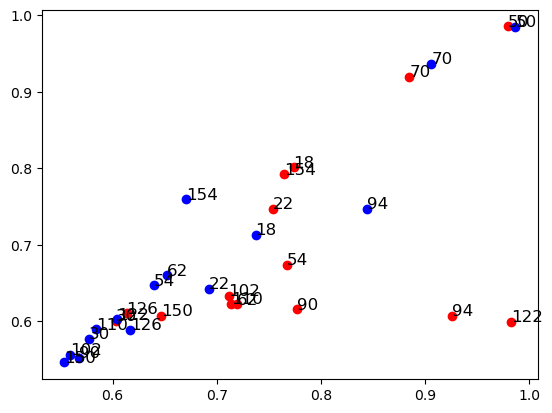

In [72]:
root="~/scratch/detailed_save/"
seed_ints = [69904,149796] #[4147842,1238860] ###
metric = "avefits"
id_start = 0

env1_end=[]
env2_end=[]
state_ave=[]
for rule in orirules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())
    state_ave.append((env1_end[-1]+env2_end[-1])/2)

root="~/scratch/non_detailed_save/"
seed_ints = [4147842,1238860] ###
for rule in orirules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())
    state_ave.append((env1_end[-1]+env2_end[-1])/2)

plt.scatter(env1_end[:15], env2_end[:15], color="red")
plt.scatter(env1_end[15:], env2_end[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(env1_end[i+15], env2_end[i+15], label, fontsize=12, color = "black")
    

0.3299984080945668


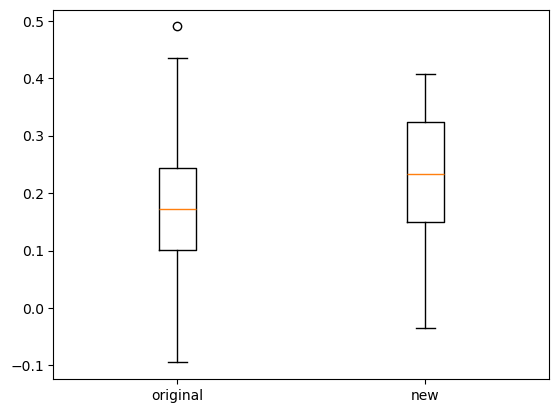

In [73]:
plt.boxplot([vari_ave[:15],vari_ave[15:]],labels=["original","new"])
t_stat, p_value = stats.ttest_ind(vari_ave[:15], vari_ave[15:])
print(p_value)

Text(0.69, 0.48, '$r$ = -0.57, $p$ = 0.000991488769543768')

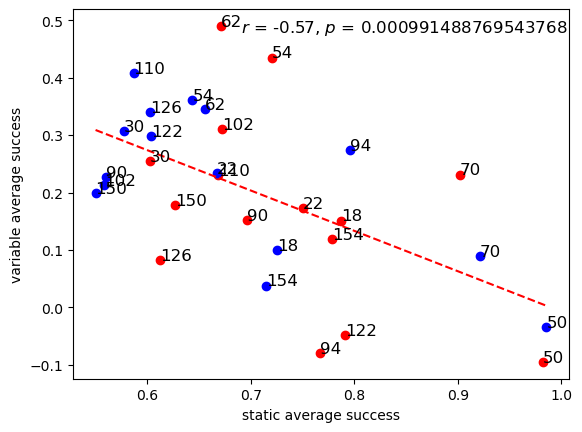

In [78]:
plt.scatter(state_ave[:15], vari_ave[:15], color="red")
plt.scatter(state_ave[15:], vari_ave[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(state_ave[i], vari_ave[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(state_ave[i+15], vari_ave[i+15], label, fontsize=12, color = "black")

x=state_ave
y=vari_ave
plt.xlabel("static average success")
plt.ylabel("variable average success")
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.text(0.69, 0.48, f'$r$ = {r_value:.2f}, $p$ = {p_value}',fontsize=12)

In [4]:
#Plotting targets
nrows = len(rules)
ncols = 2
scale=2
dev_steps=22
num_cells=22

plotting = False

counter=0
rcounter=0
targets=[]
for i in range(nrows*2):
    if counter % 2 == 0:
        start_pattern = helper.seedID2string(seed_ints[0], num_cells)
        target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        targets.append(target)
    else:
        start_pattern = helper.seedID2string(seed_ints[1], num_cells)
        target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        rcounter+=1
        targets.append(target)
    counter+=1

#----------------
if plotting:
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
    #ax.set_title(f"Rule: {rules[i]}", fontsize=16)

    axs = axs.flatten()
    counter=0
    rcounter=0
    targets=[]
    for i, ax in enumerate(axs):
        if counter % 2 == 0:
            start_pattern = helper.seedID2string(seed_ints[0], num_cells)
            target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
            #print("one",rules[rcounter])
            ax.set_ylabel(rules[rcounter], rotation=90, size='large')
            targets.append(target)
        else:
            start_pattern = helper.seedID2string(seed_ints[1], num_cells)
            target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
            #print("two",rules[rcounter])
            rcounter+=1
            targets.append(target)
        helper.imshow_ca(target,ax=ax)
        counter+=1

    for ax, col in zip(axs, ["T1","T2"]):
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1599/2939256344.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_1599/2939256344.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


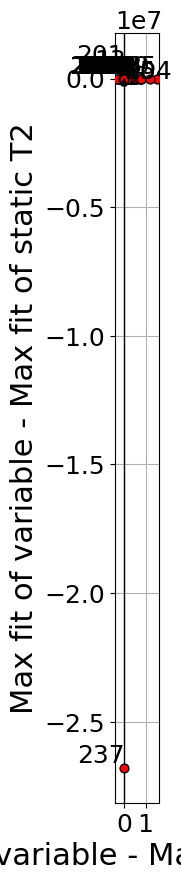

In [6]:
Ts = [
    targets[0::2],
    targets[1::2],
]

#xs,ys=pickle.load(open("2env_scatter.p", "rb"))

#rules_ims=[102,54,62,50,254,30,90,150,94,110]
#rules_scatter=[54,94,30,50,62,110,90,150,102,254]

plt.rcParams["font.size"] = 18

fig = plt.figure(constrained_layout=True, figsize=(18,10))
gs = fig.add_gridspec(len(rules), len(rules), wspace=0.0, hspace=0.2)
ax = fig.add_subplot(gs[:, :8])

helper.main_plt(xs, ys, rules, ax)

for T in [0, 1]:
    for i in range(len(rules)):
        ax = fig.add_subplot(gs[i, 8 + T])
        if i == 0 and T == 0:
            ax.set_title(f"T{T+1}", ha="center")
        if i == 0 and T == 1:
            ax.set_title(f"          T{T+1}   Rule", ha="center")
        if T == 1:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f" {rules[i]}", rotation="horizontal", ha="left")
        helper.imshow_ca(Ts[T][i], ax=ax)

plt.tight_layout()
plt.show()
#plt.savefig("figs/2envinp_scatter.png")

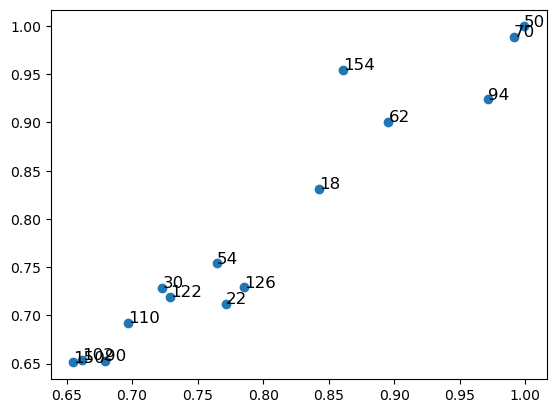

In [38]:
metric = "maxfits"
id_start = 0
env1_end=[]
env2_end=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)
#plt.xlim(0.7,1)
#plt.ylim(0.7,1)


In [ ]:
root="~/scratch/non_detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [4147842,1238860]
num_reps=5
metric = "maxfits"
id_start = 0
env1_end=[]
env2_end=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)

root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796]
num_reps=15
metric = "maxfits"
id_start = 0
env1_end2=[]
env2_end2=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)

In [33]:
rules

array([ 22, 126, 154,  18, 122,  70,  54,  94,  30,  50,  62, 110,  90,
       150, 102])

In [34]:
rules2 = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules == rules2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

22
[3088 9521 9794 7492 6323 9279 5366 8990 8701 9393 9376 9324 7462 6997
 8998]
(15, 9899)


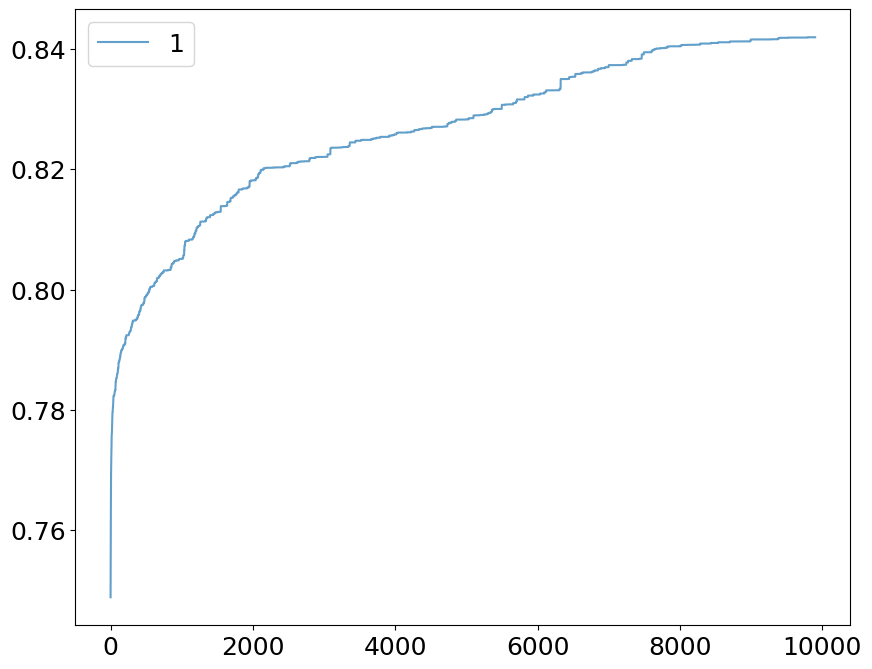

126
[9883 8512 7769 9887 9727 9616 9349 2171 9786 9579 9326 9345 7902 8908
 5215]
(15, 9899)


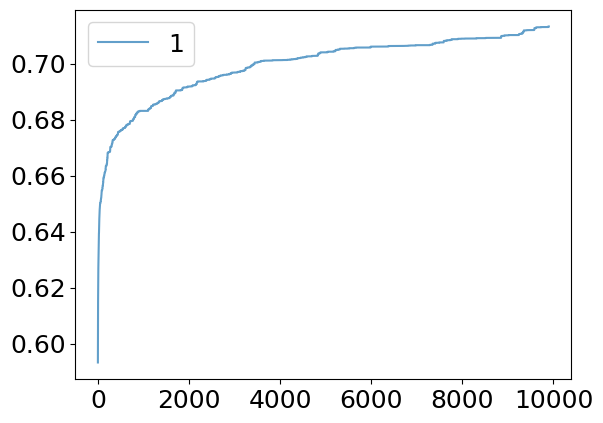

154
[8595 9896 9285 9813 7526 9689 4555 9891 9896 9397 9898 4874 9892 8855
 9495]
(15, 9899)


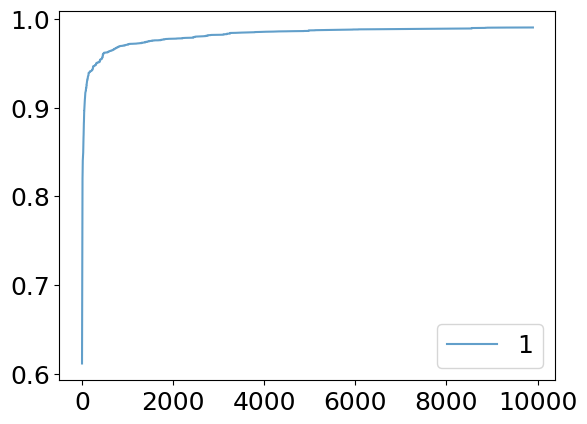

18
[2927 9815 9694 9748 9396 8926 3005 9055 8635 6405 6975 8614 9531 5779
 6668]
(15, 9899)


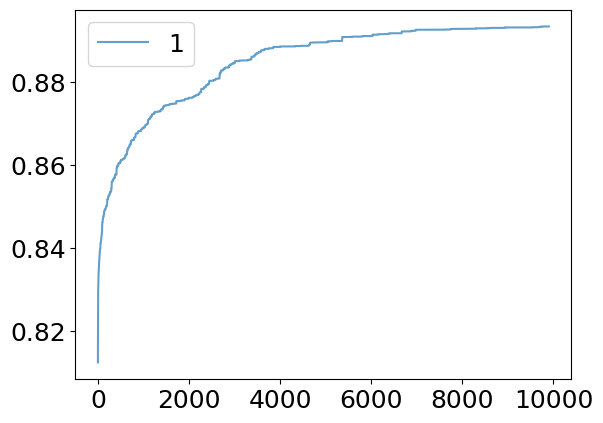

122
[2095 7097 8946 9414 8804 9717 9413 9812 9000 9733 5011 6740 9755 9852
 8734]
(15, 9899)


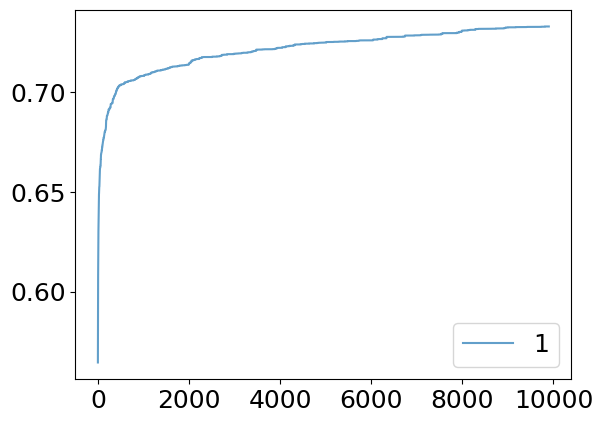

70
[4103 2624 9892 9629 3692 9898 4224 9100 9708 9485 9898 2139 9660 7927
 1682]
(15, 9899)


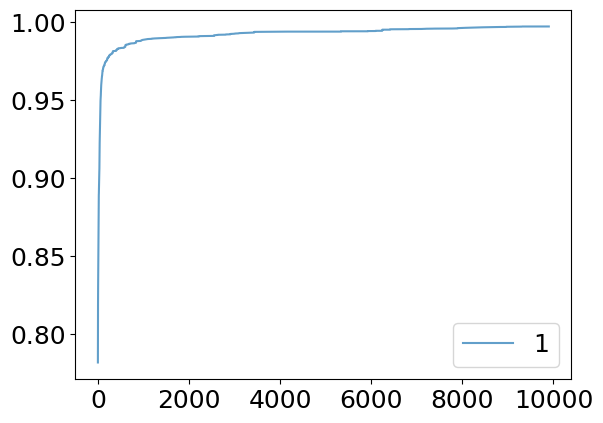

54
[9635 9279 6553 8468 8005 9747 8704 9874 9796 9201 9885 9532 9875 6604
 9799]
(15, 9899)


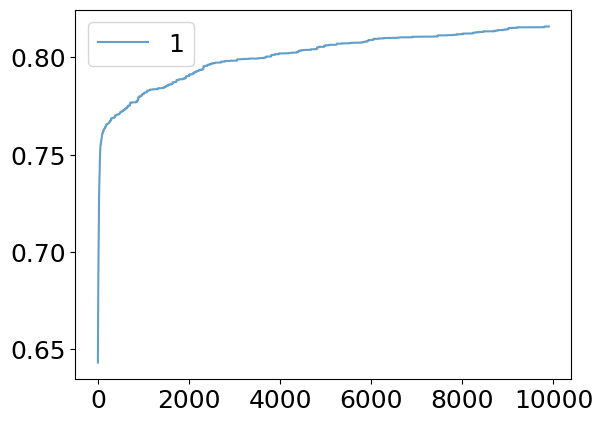

94
[9114 9522 9813 8470 8327 9200 7279 8040 9189 8670 9800 9825 7806 9755
 6425]
(15, 9899)


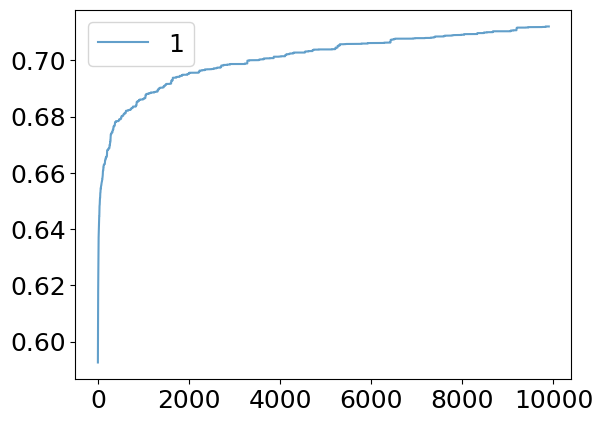

30
[9520 9866 9576 3658 5170 7494 4709 4418 9266 9417 1852 9715 8306 6817
 9843]
(15, 9899)


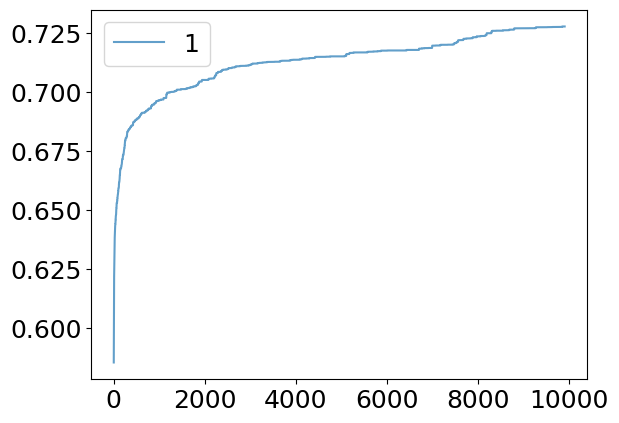

50
[8133 1898  774  918 8882  616 9774 5911  846 9269  530 9748  763 6645
 8632]
(15, 9899)


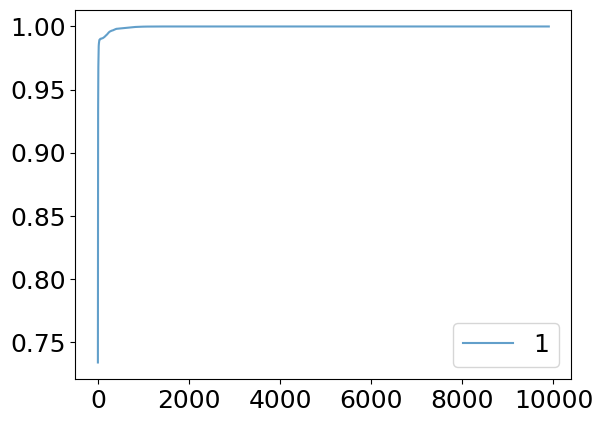

62
[7439 5145 9485 6578 8998 9266 4989 9501 8648 9411 9792 9671 9095 8608
 9689]
(15, 9899)


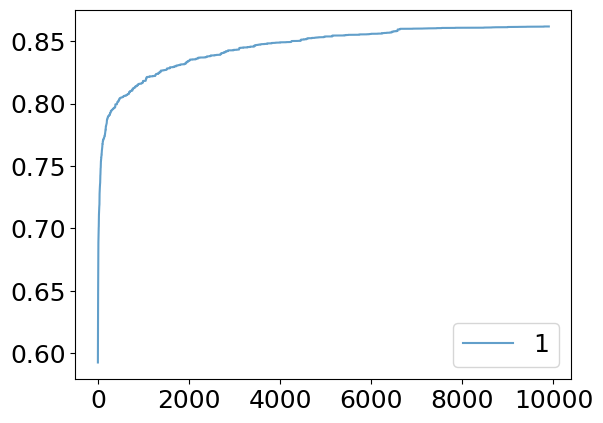

110
[7709 5352 7622 8007 9216 9089 5524 7414 8600 7015 7785 7854 9657 9821
 9879]
(15, 9899)


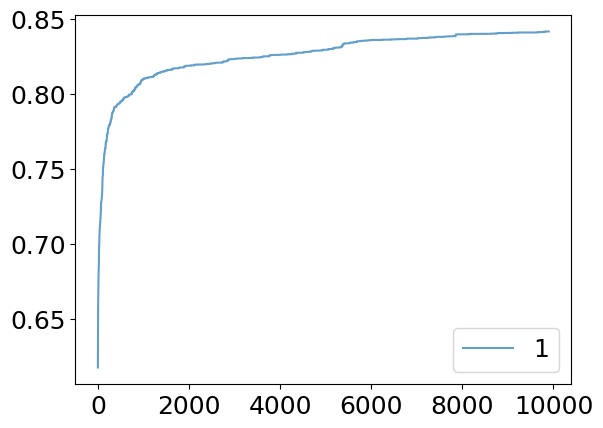

90
[3305 5795 7826 9691 9319 5974 9875 4495 9259 7444 8937 9806 9449 9591
 8683]
(15, 9899)


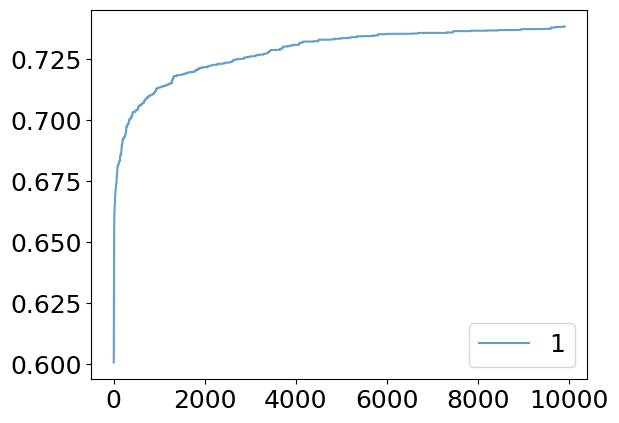

150
[8320 7977 9408 9061 8737 8674 9821 3282  861 9887 6304 6034 7371 9875
 7958]
(15, 9899)


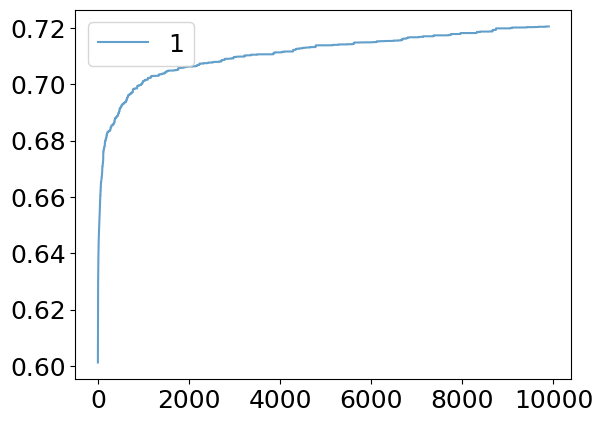

102
[7225 3719 8316 9000 8436 8917 9830 9868 9696 8600 9471 6964 5810 8625
 8747]
(15, 9899)


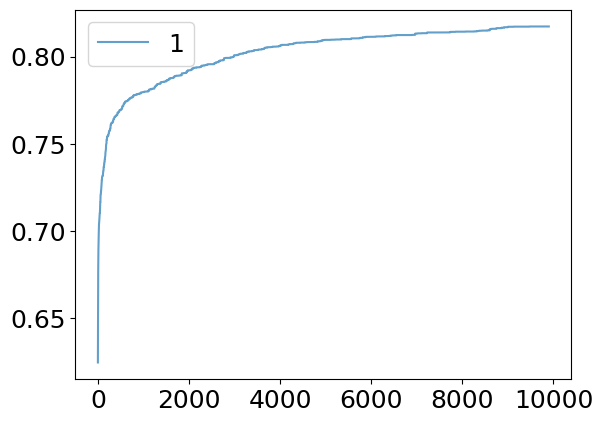

In [37]:
#102: no success env 2, 1 success env 1, 3 full success vari, another 4 close

root="~/scratch/detailed_save/"
temprules = [70]
#metric = "spec_pheno_stds"
#metric = "pheno_stds"
metric = "maxfits"
num_reps = 15
season_len=100_000#300
id_start = 0
seed_ints = [69904,149796]
#149796

maxs=[]
fig = plt.figure(figsize=(10,8))
for rule in rules:
    print(rule)
    vari_maxs=[np.loadtxt(os.path.expanduser(root+f"static/stats_{season_len}_{rule}_{149796}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
    #vari_maxs=[np.loadtxt(os.path.expanduser(root+f"static/stats_{season_len}_{rule}_{149796}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
    vari_maxs=[v[:9899] for v in vari_maxs]
    print(np.argmax(vari_maxs, axis = 1))
    #for i, v in enumerate(vari_maxs):
        #plt.plot(v,label=i, alpha = 0.7)
        #print(i)
        #plt.show()
    print(np.array(vari_maxs).shape)
    plt.plot(np.array(vari_maxs).mean(axis=0),label=i, alpha = 0.7)
    maxs.append(np.array(vari_maxs).mean(axis=0)[-1])
    plt.legend()
    #plt.xlim(0,300)
    plt.show()

In [38]:
print(maxs)

[0.8419417070927072, 0.7132473393348688, 0.9903762915173657, 0.8934772282770693, 0.7331140132680428, 0.9970616811236872, 0.8159153898599029, 0.7120286610623949, 0.7279448462160018, 0.9999999999999998, 0.8618669243827536, 0.8416067586683113, 0.738241371359846, 0.7205135024001457, 0.8172591238446502]


In [20]:
metric, rule

('maxfits', 70)

(15, 9899)


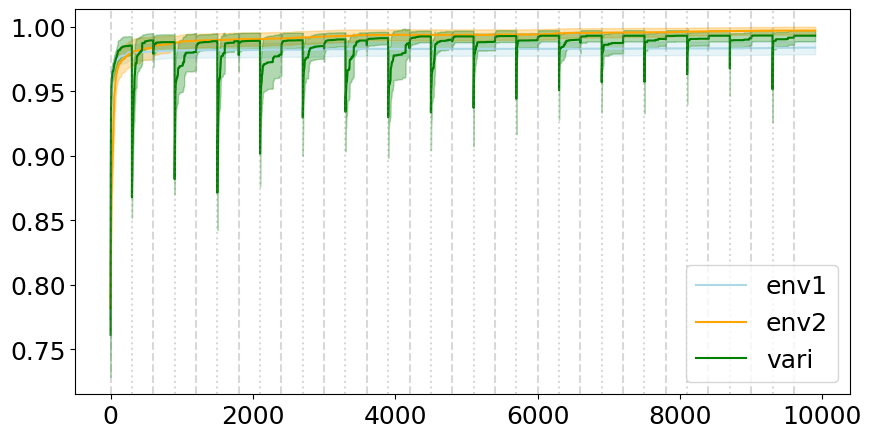

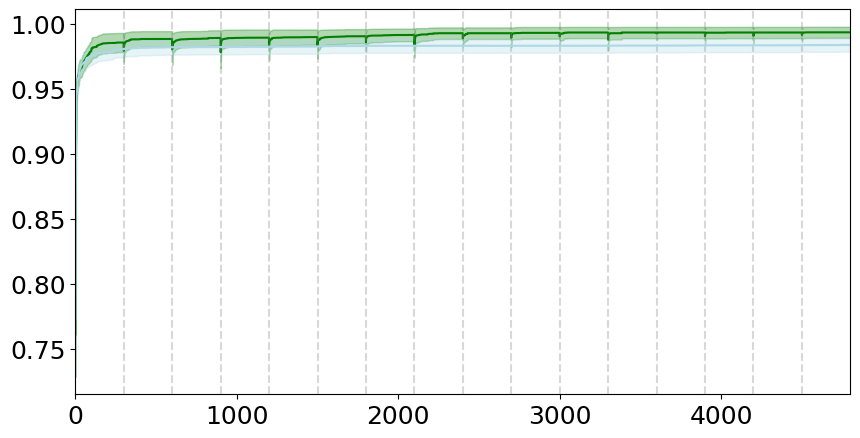

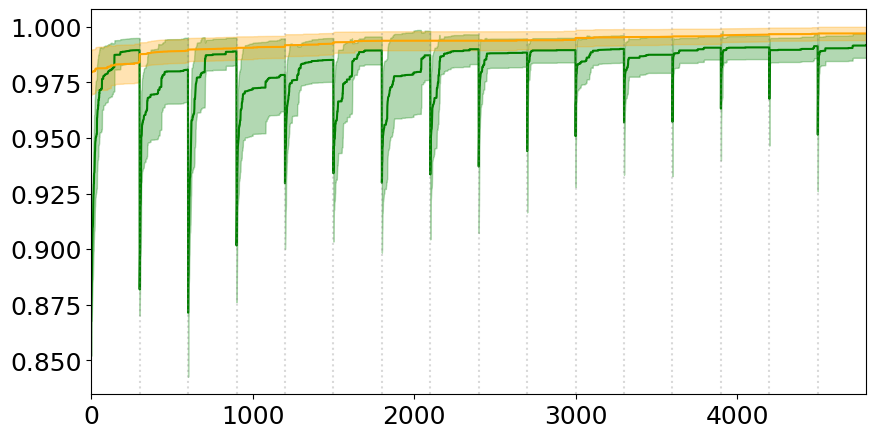

In [21]:
all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
all_maxs=np.array(all_maxs)
labels=["vari","env1","env2"]
colors = ["green", "lightblue", "orange"]
z_value = 1.96  # For a 95% confidence interval

print(np.array(vari_maxs).shape)

#plot all variable, together
fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
for i,m in enumerate(all_maxs[1:]):
    mean1 = np.mean(m, axis=0)
    stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1:][i])
    ax.plot(mean1, "-", label=labels[1:][i], color = colors[1:][i])
m=vari_maxs #all_maxs[0]
mean1 = np.mean(m, axis=0)
stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
ax.plot(mean1, "-", label= labels[0], color=colors[0])
#ax.set_xlim(1000,1700)
ax.legend()
for j in range(0, len(mean1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)

'''
#put together with color
season1, season2, gens1, gens2 = helper.chunker_plotting(mean1, season_len = 300)
season1_std, season2_std, _, _ = helper.chunker_plotting(stderr1, season_len = 300)
fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
for i in range(len(gens1)):
    ax.plot(gens1[i], season1[i],color="C1")
    ax.fill_between(gens1[i], season1[i] - season1_std[i], season1[i] + season1_std[i], alpha=0.3,color="C1")
    ax.plot(gens2[i], season2[i],color="C2")
    ax.fill_between(gens2[i], season2[i] - season2_std[i], season2[i] + season2_std[i], alpha=0.3,color="C2")
for j in range(0, len(mean1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
plt.show()
'''

#chunk it up!
season1, season2, chunked_gens1, chunked_gens2 = helper.chunker_plotting(mean1, season_len = 300)
season1 = np.reshape(season1, (season1.shape[0]*season1.shape[1]))
season2 = np.reshape(season2, (season2.shape[0]*season2.shape[1]))

season1_std, season2_std, _, _ = helper.chunker_plotting(stderr1, season_len = 300)
season1_std = np.reshape(season1_std, (season1_std.shape[0]*season1_std.shape[1]))
season2_std = np.reshape(season2_std, (season2_std.shape[0]*season2_std.shape[1]))

#chunk the statics too
chunked_gens1 = np.array([x for xs in chunked_gens1 for x in xs])
chunked_gens2 = np.array([x for xs in chunked_gens2 for x in xs])

fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
ax.plot(season1,color=colors[0])
ax.fill_between(range(len(season1)), season1 - z_value*season1_std, season1 + z_value*season1_std, alpha=0.3,color=colors[0])
for j in range(0, len(season1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
mean1 = np.mean(all_maxs[1][:, chunked_gens1], axis=0) #all reps, only chunked gens
stderr1 = np.std(all_maxs[1][:, chunked_gens1], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1])
ax.plot(mean1, "-", label=labels[1], color = colors[1])
plt.xlim(0, len(season1))
#plt.ylim(0.8,0.9)
plt.show()

fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
ax.plot(season2,color=colors[0])
ax.fill_between(range(len(season2)), season2 - z_value*season2_std, season2 + z_value*season2_std, alpha=0.3,color=colors[0])
for j in range(0, len(season2), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
mean1 = np.mean(all_maxs[2][:, chunked_gens2], axis=0)
stderr1 = np.std(all_maxs[2][:, chunked_gens2], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[2])
ax.plot(mean1, "-", label=labels[2], color = colors[2])
plt.xlim(0, len(season1))
#plt.ylim(0.9,1)
plt.show()

In [21]:
root = "~/Documents/GitHub/CA_GRN2/results_testing_saving/"
avail_metrics = ["avefits","maxfits","beststd","spec_pheno_stds", "pheno_stds","geno_stds"]
metric = avail_metrics[5]
rules = [rule,rule]
output=[np.loadtxt(os.path.expanduser(root+f"stats_{season_len}_{rules[0]}-{rules[1]}_{seed_ints[0]}-{seed_ints[1]}_{i+1}_{metric}.txt")) for i in range(1)]

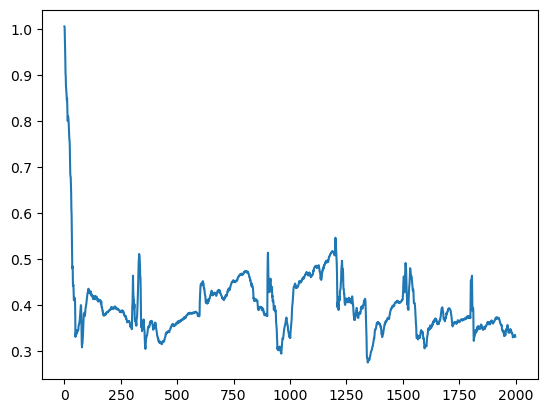

In [22]:
plt.plot(output[0])